In [1]:
from __future__ import print_function, division
import numpy as np
import numpy.linalg as linalg
from math import tan, pi, atan, cos, sin, asin
import matplotlib.pyplot as plt
from scipy.misc import imread as imread

# For IPython interactive widgets
from ipywidgets import interact, interactive, FloatSlider 
from IPython.display import display, Image

import iutils.optics.goptics as go
import iutils.plot.mplutils as mpu


In [2]:
tand = lambda angle: tan(pi*angle/180.0)
cosd = lambda angle: cos(pi*angle/180.0)
sind = lambda angle: sin(pi*angle/180.0)
arctand = lambda x : np.rad2deg(np.arctan(x))

def is_even(num):
    return num%2 == 0

In [3]:
%matplotlib inline

In [7]:
def get_points(angleY, xo, ymin=-100, ymax=10, n=10):
    """angleY : angle w.r.t. the y-axis in degrees"""
    y = np.linspace(ymin, ymax, n)
    x = xo + y*tand(angleY)
    return x, y

def zo(f, zodash, alpha):
    """alpha: angle w.r.t y axis"""
    return -(zodash*f)/(zodash*cosd(alpha)  - f)

def beta(f, zo, alpha):
    return arctand((abs(zo)/f)*sind(alpha))  # why the explicity abs???

In [11]:
go.gaussian_lens_formula(u=1000, v=None, f=24)

glfParams(u=1000, v=24.59016393442623, f=24)

uo =  120.0
-25.0 -225.759567281
-18.75 -163.342944585
-12.5 -136.134677081
-6.25 -123.675424466
0.0 -120.0


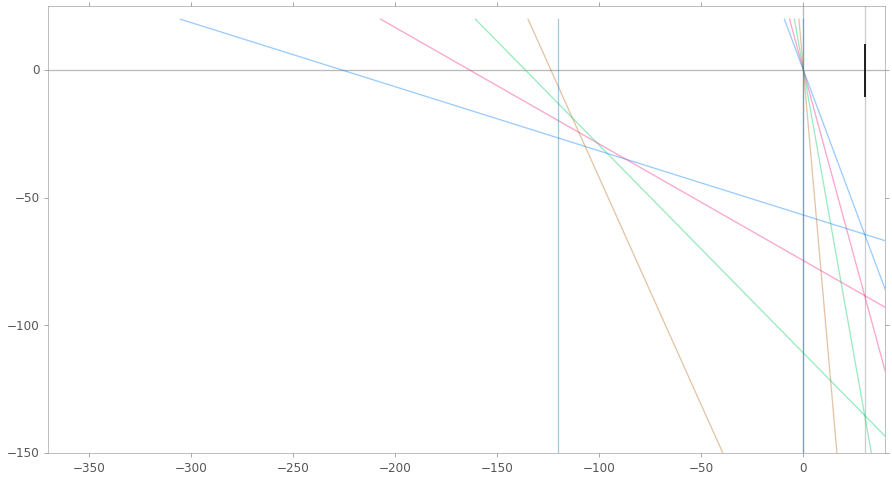

In [12]:
# parameters
#distances 800, 1000, 1200
#defocus 0.2517254

zodash = 30
f = 24

uo = go.gaussian_lens_formula(u=None, v=zodash, f=f).u
print('uo = ', uo)


fig, ax = plt.subplots(1, 1, figsize=(15, 8))
cols = ['#0080FF', '#F52080', '#00CC60', '#B96F20', '#1f77b4', 
        '#ff7f0e', '#2ca02c', '#8c564b', '#00BFFF', '#FF8073',
        '#11FFAA', '#CEb631', '#7088F6', '#f67088', '#80FF80', 
        '#EAC910', '#38A7D0', '#f34060', '#40d370', '#CE8f31', 
        '#2166AC', '#B2182B', '#32b135', '#814D16', '#606060',
        '#0080FF', '#F52080', '#00CC60', '#B96F20', '#1f77b4', 
        '#ff7f0e', '#2ca02c', '#8c564b', '#00BFFF', '#FF8073',
        '#11FFAA', '#CEb631', '#7088F6', '#f67088', '#80FF80', 
        '#EAC910', '#38A7D0', '#f34060', '#40d370', '#CE8f31', 
        '#2166AC', '#B2182B', '#32b135', '#814D16', '#606060']

ymin, ymax = -150, 25
#ymin, ymax = -150, 150

ax.set_xlim(-uo-250, zodash + 10)
ax.set_ylim(ymin, ymax)

ax.axvline(color='#BBBBBB',)
ax.axhline(color='#BBBBBB',)


# draw image plane
ax.axvline(x=zodash, ymin=ymin, ymax=ymax, color='#CCCCCC')
x, y = get_points(0, zodash, -10, 10)
ax.plot(x, y, color='#222222', lw=2,)

# draw lens plane
#alpha = np.linspace(-30, 30, 50)
alpha = np.linspace(-25, 0, 5)

for i, each in enumerate(alpha):
    #print('alpha', each)
    x, y = get_points(each, 0, ymin, ymax-5)
    ax.plot(x, y, color=cols[i], alpha=0.4)
    x, y = get_points(each, 0, -10, 10)
    #ax.plot(x, y, color=cols[i], lw=2)
    
# draw object plane
for i, each in enumerate(alpha):
    xo = zo(f, zodash, each)
    #print(each, xo)
    angleY = beta(f, xo, each)
    #print('beta', angleY)
    x, y = get_points(angleY, xo, ymin, ymax-5)
    ax.plot(x, y, color=cols[i], alpha=0.4)
    x, y = get_points(angleY, xo, -10, 10)
    #ax.plot(x, y, color=cols[i], lw=2)
    

plt.show()


Rigid camera

In [ ]:
# parameters
#distances 800, 1000, 1200
#defocus 0.2517254

zodash = 30  # Initial zodash
f = 24

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
cols = ['#0080FF', '#F52080', '#00CC60', '#B96F20', '#1f77b4', 
        '#ff7f0e', '#2ca02c', '#8c564b', '#00BFFF', '#FF8073',
        '#11FFAA', '#CEb631', '#7088F6', '#f67088', '#80FF80', 
        '#EAC910', '#38A7D0', '#f34060', '#40d370', '#CE8f31', 
        '#2166AC', '#B2182B', '#32b135', '#814D16', '#606060',
        '#0080FF', '#F52080', '#00CC60', '#B96F20', '#1f77b4', 
        '#ff7f0e', '#2ca02c', '#8c564b', '#00BFFF', '#FF8073',
        '#11FFAA', '#CEb631', '#7088F6', '#f67088', '#80FF80', 
        '#EAC910', '#38A7D0', '#f34060', '#40d370', '#CE8f31', 
        '#2166AC', '#B2182B', '#32b135', '#814D16', '#606060']

ymin, ymax = -150, 25
#ymin, ymax = -150, 150

ax.set_xlim(-uo-250, zodash + 10)
ax.set_ylim(ymin, ymax)

ax.axvline(color='#BBBBBB',)
ax.axhline(color='#BBBBBB',)



# draw lens plane
x.axvline(x=0, ymin=ymin, ymax=ymax, color='#CCCCCC')
x, y = get_points(0, 0, -10, 10)
ax.plot(x, y, color='#222222', lw=2,)


# draw image plane
ax.axvline(x=zodash, ymin=ymin, ymax=ymax, color='#CCCCCC')
x, y = get_points(0, zodash, -10, 10)
ax.plot(x, y, color='#222222', lw=2,)

# draw lens plane
#alpha = np.linspace(-30, 30, 50)
alpha = np.linspace(-25, 0, 5)

for i, each in enumerate(alpha):
    #print('alpha', each)
    x, y = get_points(each, 0, ymin, ymax-5)
    ax.plot(x, y, color=cols[i], alpha=0.4)
    x, y = get_points(each, 0, -10, 10)
    #ax.plot(x, y, color=cols[i], lw=2)
    
# draw object plane
for i, each in enumerate(alpha):
    xo = zo(f, zodash, each)
    angleY = beta(f, xo, each)
    #print('beta', angleY)
    x, y = get_points(angleY, xo, ymin, ymax-5)
    ax.plot(x, y, color=cols[i], alpha=0.4)
    x, y = get_points(angleY, xo, -10, 10)
    #ax.plot(x, y, color=cols[i], lw=2)
    

plt.show()
